# Choose a Data Set

Create your own dataset by scraping one of the following websites *(level 5)*:
- [Wikipedia](https://www.wikipedia.org/)
- [OpenLibrary](https://openlibrary.org/)

**OR** 

Use data gathered from one of the following APIs *(level 4)*: 
- [TMDB](https://developer.themoviedb.org/reference/intro/getting-started)
- [College Scorecard](https://collegescorecard.ed.gov/data/api-documentation/)

**OR** 

Pick a JSON dataset *(level 3)*:
- [Food/Restaurant Data](https://drive.google.com/drive/folders/1V94S6WpclvQmbnW88KVMD4EruryA1oma?usp=drive_link)
- [Fashion Data](https://drive.google.com/drive/folders/1V8SbFjtRRW8WVf3xBzg0gzLjOtMhHea_?usp=drive_link)

**OR** 

Pick a CSV dataset *(level 2)*:
- [LA Parking Tickets](https://drive.google.com/drive/folders/1vaOfwMi6QmZEGsXr8VM0ulPGzvTTBCgm?usp=drive_link)
- [Hotels](https://drive.google.com/drive/folders/1IpVFxgwBJvJHKoOuBsk6WK2qYqFYP4hi?usp=drive_link)

# My Question
### You are looking at the trending books, more specifically, the "This Year" trending category. If a book were to get into the "This Year" trending category, what is the expected amount of editions it would have? Also, what is the probabilty of the book having over 100 editions?

Having over 500 editions would count as the category "Way Too Many

# My Answer
### The expected amount of editions that a new book that enters the "This Year" trending category is 110 editions. We know for a fact that a book in this category will have atleast 1 edition(otherwise it wouldn't exist?). There was a standard deviation of 509 books, but again, it isn't a good idea to use it given that the histogram is highly skewed right. 
### The probability of the book to have over 100 editions is 16.4%. When doing this calculation, 6% of books had over 1000 editions, 2% over 500(between 500 and 1000) and 19% over 100 editions, which made it so that 27% had over 100 editions and leaving 73% that don't.

In [1]:
#Importing what we need
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import seaborn as sns

import numpy as np



In [2]:
def cycle_through5(page):
    book_ratings = {"Title": [], "Author": [], "Editions": []}  
    count = 1  # Start from the first page

    while count <= page: 
        url = f"https://openlibrary.org/trending/yearly?page={count}"
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')

        titles = soup.find_all("h3", {"class": "booktitle"})
        for title in titles:
            book_ratings["Title"].append(title.get_text(strip=True))

        authors = soup.find_all("a")
        for author in authors:
            if "/authors/" in author.get("href", ""):
                book_ratings["Author"].append(author.get_text(strip=True))

        
        #span_rate = soup.find_all('span', itemprop='ratingValue')   ### Finding rating, but there was a chage of plans!
        #for span in span_rate:
            #text = span.text.strip()
            #book_ratings["Rating"].append(text)
        
        
        editions = soup.find_all("a")
        for edition in editions:
    
            if "/works/" in edition.get("href", ""):
                edition_text = edition.get_text(strip=True)
        
                if "edition" in edition_text.lower():
                    match = re.search(r'\d+', edition_text) 
                    if match: 
                        number = match.group()  
                        book_ratings["Editions"].append(number)
            
        
        print(f"Page {count} scraped successfully.")
        count += 1

    min_length = min(len(book_ratings["Title"]), len(book_ratings["Author"]), len(book_ratings["Editions"]))
    for key in book_ratings:
        book_ratings[key] = book_ratings[key][:min_length]
    return book_ratings

In [3]:
df = pd.DataFrame(cycle_through5(20))
df

Page 1 scraped successfully.
Page 2 scraped successfully.
Page 3 scraped successfully.
Page 4 scraped successfully.
Page 5 scraped successfully.
Page 6 scraped successfully.
Page 7 scraped successfully.
Page 8 scraped successfully.
Page 9 scraped successfully.
Page 10 scraped successfully.
Page 11 scraped successfully.
Page 12 scraped successfully.
Page 13 scraped successfully.
Page 14 scraped successfully.
Page 15 scraped successfully.
Page 16 scraped successfully.
Page 17 scraped successfully.
Page 18 scraped successfully.
Page 19 scraped successfully.
Page 20 scraped successfully.


,Title,Author,Editions
0,Atomic Habits,James Clear,41
1,Control Your Mind and Master Your Feelings,Eric Robertson - undifferentiated,3
2,The 48 Laws of Power,Robert Greene,52
3,It Ends With Us,Joost Elffers,34
4,I Don't Love You Anymore,Colleen Hoover,2
...,...,...,...
393,Influence,Όμηρος,11
394,Into the Wild,Benjamin Graham,24
395,Beloved,Nicholas Sparks,38
396,The Blood of Olympus,Alice Oseman,104


In [4]:
df["Editions"] = pd.to_numeric(df["Editions"], errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     398 non-null    object
 1   Author    398 non-null    object
 2   Editions  398 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


***Describe analysis here.***

### The code above is just scraping the web pages needed to make a dataframe that we can use for the rest of the problem. 
Also, there are many variables that say "book_ratings" when we are not looking at book ratings anymore because of a fluke that we saw in the "OpenLibrary"(our code to be exact). We just didn't change the variable name. We also discovered the "re" import. Also, making the function print "scraped successfully" is fun to watch, so it was kept.

In [43]:
# Alternate between code for analysis and markdown descriptions of your analysis
# Add more code or markdown cells if needed to fully explain analysis

# Define conditions and corresponding values
conditions = [
    #df["Editions"] > 500,  # Way Too Many
    #df["Editions"] > 100,  # Too Many
    df["Editions"] > 1000,   # E_High   # This is Extremely High
    df["Editions"] > 500,   # High
    df["Editions"] > 100,   # Medium
    df["Editions"] >= 30 ,   # Fair
    df["Editions"] < 30    # Few
]
#values = ["Way Too Many", "Too Many", "E_High", "High", "Medium", "Decent", "Few"]
values = ["E_High", "High", "Medium", "Fair", "Few"]

# Assign values based on conditions
df["Edition_groups"] = np.select(conditions, values, default=0)

In [46]:
df["Edition_groups"].value_counts()

Edition_groups
Few       197
Fair       89
Medium     76
E_High     26
High       10
Name: count, dtype: int64

In [7]:
df

,Title,Author,Editions,Edition_groups
0,Atomic Habits,James Clear,41,High
1,Control Your Mind and Master Your Feelings,Eric Robertson - undifferentiated,3,Few
2,The 48 Laws of Power,Robert Greene,52,E_High
3,It Ends With Us,Joost Elffers,34,High
4,I Don't Love You Anymore,Colleen Hoover,2,Few
...,...,...,...,...
393,Influence,Όμηρος,11,Decent
394,Into the Wild,Benjamin Graham,24,Medium
395,Beloved,Nicholas Sparks,38,High
396,The Blood of Olympus,Alice Oseman,104,Too Many


In [45]:
df["Edition_groups"].value_counts()

Edition_groups
Few       197
Fair       89
Medium     76
E_High     26
High       10
Name: count, dtype: int64

***Describe analysis here.***
#### We categorized books by the amount of editions they have. For example, if a book has over 100 editions, it would be grouped as "Too Many", meaning that book has a lot of editions. A book with 26 editions would be categorized as "Medium". This is done to also get the frequency of the groups, example, there are 83 books with a decent amount of editions.

In [15]:
df["Edition_groups"] = df["Edition_groups"].astype(str)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           398 non-null    object
 1   Author          398 non-null    object
 2   Editions        398 non-null    int64 
 3   Edition_groups  398 non-null    object
dtypes: int64(1), object(3)
memory usage: 12.6+ KB


<Axes: xlabel='Editions', ylabel='Count'>

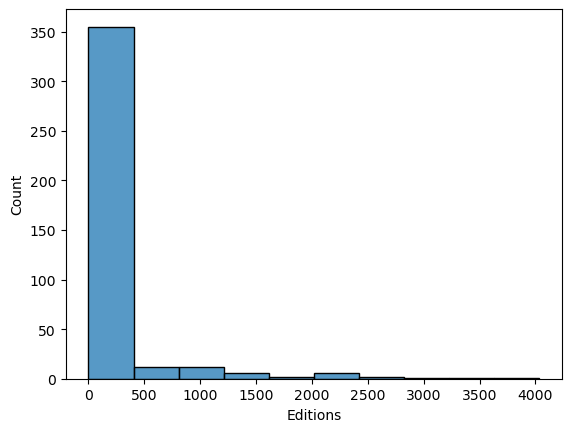

In [35]:
# Add more code/markdown cells here if you need them.
sns.histplot(data=df, x="Editions", bins=10)
#sns.histplot(data=df, x="Edition_groups", bins=20)

In [36]:
df["Editions"].std()

509.81068310091763

#### Analysis
#### We made a histogram, apparently it is not vary reliable to find a standard deviation, since it is 509.8 editions and the graph is skewed right(alot).

In [59]:
print(26/398) #E_H
print(10/398) #H
print(76/398) #M  over 100 editions
print(89/398) #D
print(197/398) #F
 



0.06532663316582915
0.02512562814070352
0.19095477386934673
0.2236180904522613
0.4949748743718593


# Expected Value = Probability * Value

In [60]:
Expected_Value = (1 * 1) + (29 * 0.49) + (30 * 0.22) + (100 * 0.19) + (500 * 0.02) + (1000 * 0.06)
Expected_Value

110.81

### The expected amount of editions a book on this year's trending should have is 110. 
### Although, using the standard deviation from above, that would increase it to also expecting 519 editions, which can't be trusted that much because the histogram isn't really symmetrical and it is skewed right.

In [66]:
# P(A|B) = P(B|A) * P(A)
#          ------------
#              P(B)

# 19% of books have over 100 editions, also 6% of books get over 1000 editions(meaning that they still have over 100) and 2% to have over 500 
# while 73% of books have less than 100 editions.

# A = Having over 100 editions  B = Not having over 100 editions
# P(B|A)  = (0.73 * 0.27) P(A) = 0.27
# P(B) =   ((0.73 * 0.27) * 0.27) + 0.27
pba_sandwich = (0.73 * 0.27) * 0.27
prob_B = pba_sandwich + 0.27
probability = pba_sandwich / prob_B

In [67]:
probability

0.1646478990894662

#### The probability of a book that enters the "This Year" trending to have over 100 editions is 16.4%
I hope that the model question is atleast somewhat on the right track for this to be "accurate".